In [2]:
# # Design a classification model using the Car Evaluation dataset to predict the overall car acceptability
#  (unacceptable, acceptable, good, very good) based on features such as
#   safety, price, and maintenance cost. The goal is to help in the automatic rating of cars for decision support in automobile sales.

In [4]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("/content/Classification Datasets_Car_Evaluation.csv")

In [8]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [14]:
cols = ['buying',	'maint',	'doors',	'persons',	'lug_boot',	'safety',	'class']
for col in cols :
    print(df[col].unique())

['vhigh' 'high' 'med' 'low']
['vhigh' 'high' 'med' 'low']
['2' '3' '4' '5more']
['2' '4' 'more']
['small' 'med' 'big']
['low' 'med' 'high']
['unacc' 'acc' 'vgood' 'good']


In [11]:
df['buying'].unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [15]:
x = df.drop('class', axis=1)
y = df['class']

In [17]:
# Step 3: Encode categorical features (since all are categorical)
categories = [
    ['vhigh', 'high', 'med', 'low'],   # buying
    ['vhigh', 'high', 'med', 'low'],   # maint
    ['2', '3', '4', '5more'],          # doors
    ['2', '4', 'more'],                # persons
    ['small', 'med', 'big'],           # lug_boot
    ['low', 'med', 'high']             # safety
]

In [20]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [24]:
encoder = OrdinalEncoder(categories=categories)
X_encoded = encoder.fit_transform(x)


In [22]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
# Step 4: Split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

# Step 5: Create and train Decision Tree model
model = DecisionTreeClassifier(max_depth=5,random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [47]:
y_pred = model.predict(X_test)

# Step 7: Evaluate model
print("\nModel Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Model Evaluation:
Accuracy: 0.869942196531792

Classification Report:
               precision    recall  f1-score   support

         acc       0.72      0.79      0.75        77
        good       0.00      0.00      0.00        14
       unacc       0.94      0.95      0.95       242
       vgood       0.56      0.69      0.62        13

    accuracy                           0.87       346
   macro avg       0.56      0.61      0.58       346
weighted avg       0.84      0.87      0.85       346


Confusion Matrix:
 [[ 61   0  14   2]
 [  9   0   0   5]
 [ 11   0 231   0]
 [  4   0   0   9]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [41]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [48]:
cm = confusion_matrix(y_test, y_pred)

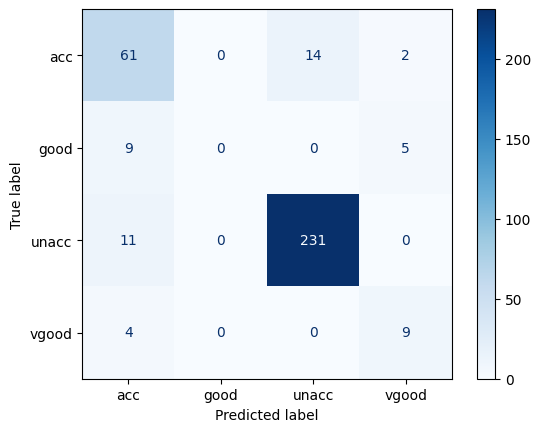

In [49]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="Blues", values_format='d')
plt.show()

In [44]:
# from sklearn import tree
# plt.figure(figsize=(20,10))
# tree.plot_tree(clf,
#                feature_names=X.columns,
#                class_names=clf.classes_,
#                filled=True,
#                rounded=True)
# plt.title("Decision Tree for Car Evaluation")
# plt.show()

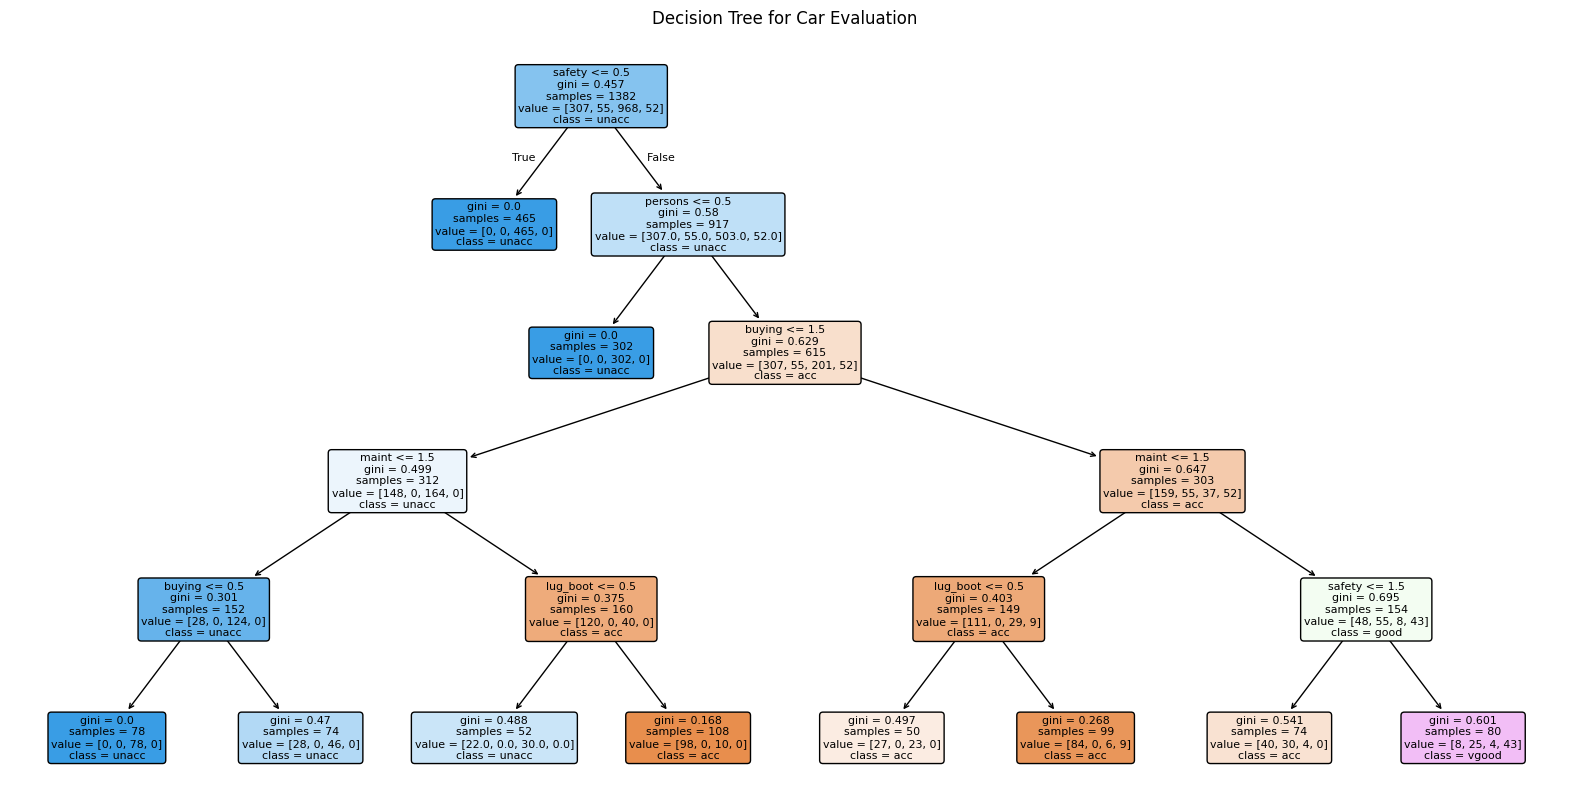

In [50]:
from sklearn import tree
plt.figure(figsize=(20,10))

tree.plot_tree(model,
               feature_names = x.columns,
               class_names=model.classes_,
               filled=True,
               rounded=True)
plt.title("Decision Tree for Car Evaluation")
plt.show()